# 1. Data Sourcing

#### Loading the data to CSV file and print first five rows

In [1]:
import pandas as pd
import numpy as np
loan = pd.read_csv(r"C:\Users\i320807\Desktop\DS\Case Study\loan\loan.csv",low_memory=False)
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


#### Print the info of data set to know column types and null values

In [2]:
loan.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    id                              39717 non-null  int64  
 1    member_id                       39717 non-null  int64  
 2    loan_amnt                       39717 non-null  int64  
 3    funded_amnt                     39717 non-null  int64  
 4    funded_amnt_inv                 39717 non-null  float64
 5    term                            39717 non-null  object 
 6    int_rate                        39717 non-null  object 
 7    installment                     39717 non-null  float64
 8    grade                           39717 non-null  object 
 9    sub_grade                       39717 non-null  object 
 10   emp_title                       37258 non-null  object 
 11   emp_length                      38642 non-null  object 
 12   home_ownership  

## 1.1 Observation 
From info we can conclude there are many columns which are having empty values in columns. Hence next action is to clean empty values

# 2. Data Cleaning

####  Remove columns having null values

In [3]:
loan_column_filter = loan.dropna(axis=1, how='all')

In [4]:
print(loan.shape)
print(loan_column_filter.shape)

(39717, 111)
(39717, 57)


## 2.1 Observation
After removing null/empty columns data column size reduced to 57 from 111

#### Dropping columns having values only one unique value across Rows

In [5]:
loan_column_filter.nunique().sort_values().head(15)

tax_liens                     1
delinq_amnt                   1
chargeoff_within_12_mths      1
acc_now_delinq                1
application_type              1
policy_code                   1
collections_12_mths_ex_med    1
pymnt_plan                    1
initial_list_status           1
term                          2
next_pymnt_d                  2
pub_rec_bankruptcies          3
loan_status                   3
verification_status           3
pub_rec                       5
dtype: int64

In [6]:
loan_column_filter = loan_column_filter.drop(["tax_liens","delinq_amnt","chargeoff_within_12_mths","acc_now_delinq","application_type","policy_code","collections_12_mths_ex_med","pymnt_plan","initial_list_status"],axis=1)

#### Check for Percentage of empty/null present in each column

In [7]:
# Identify the percentage of values in each column
value_percent = (loan_column_filter.isnull().sum()/loan_column_filter.shape[0])*100
value_percent

id                          0.000000
member_id                   0.000000
loan_amnt                   0.000000
funded_amnt                 0.000000
funded_amnt_inv             0.000000
term                        0.000000
int_rate                    0.000000
installment                 0.000000
grade                       0.000000
sub_grade                   0.000000
emp_title                   6.191303
emp_length                  2.706650
home_ownership              0.000000
annual_inc                  0.000000
verification_status         0.000000
issue_d                     0.000000
loan_status                 0.000000
url                         0.000000
desc                       32.580507
purpose                     0.000000
title                       0.027696
zip_code                    0.000000
addr_state                  0.000000
dti                         0.000000
delinq_2yrs                 0.000000
earliest_cr_line            0.000000
inq_last_6mths              0.000000
m

## 2.2 Observations
There are columns such as mths_since_last_delinq,mths_since_last_record and next_pymnt_d having more than 60% Null values which won't provide much insights to the data and hence removing them

In [8]:
drop_columns = value_percent[value_percent>60].keys()

loan_column_filter = loan_column_filter.drop(drop_columns, axis=1)

## 2.3 Observations
There are certain behaviour variables which are not available at the time of applying loans and hence these columns can be removed since they can't be used to predict loan approval
Below are the set of variables
**delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt,inv,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d**

In [9]:
loan_column_filter = loan_column_filter.drop(["delinq_2yrs","earliest_cr_line","inq_last_6mths","open_acc","pub_rec","revol_bal","revol_util","total_acc","out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee","last_pymnt_d","last_pymnt_amnt","last_credit_pull_d"],axis=1)

In [10]:
loan_column_filter.shape

(39717, 26)

## 2.4 Observations
There are certain columns such as emp_title and emp_length,pub_rec_bankruptcies and desc having some percentage of null values, lets analyse Values of each column

In [11]:
loan_column_filter.emp_title.value_counts()

US Army                              134
Bank of America                      109
IBM                                   66
AT&T                                  59
Kaiser Permanente                     56
                                    ... 
Community College of Philadelphia      1
AMEC                                   1
lee county sheriff                     1
Bacon County Board of Education        1
Evergreen Center                       1
Name: emp_title, Length: 28820, dtype: int64

In [12]:
loan_column_filter.emp_length.value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [13]:
loan_column_filter.pub_rec_bankruptcies.value_counts()

0.0    37339
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

## 2.5 Observations
From above results we can derive below points \
    1. **desc** column provide information about borrower as short text. Since its paragraph text, dropping the column\
    2. **emp_title** is having many discrete values - this will be unorder categorical variable. Dropping this column(can't derive insights from this)\
    3. **emp_year** is having finite set - Ordered categorical variable - keeping the column\
    4. **pub_rec_bankruptcies** column having some empty value. Hence removing columns with empty values

In [14]:
loan_column_filter.drop('desc',axis=1,inplace=True)

In [15]:
loan_column_filter.drop('emp_title',axis=1,inplace=True)

In [16]:
len(loan_column_filter[loan_column_filter.pub_rec_bankruptcies.isnull()])

697

In [17]:
#Remove the empty rows for column pub_rec_bankruptcies
loan_column_filter = loan_column_filter[~loan_column_filter.pub_rec_bankruptcies.isnull()]

In [18]:
loan_column_filter.shape

(39020, 24)

## 2.6 Observation
Since purpose of this EDA is to decide on whether loan applicant is eligible for taking loan(Are they able to repay the loan or not), we can **remove the records where loan staus is Current**

In [19]:
len(loan_column_filter[loan_column_filter.loan_status == 'Current'])

1140

In [20]:
#Remove 1140 records having status as Current
loan_column_filter = loan_column_filter[~(loan_column_filter.loan_status =='Current')]

In [21]:
loan_column_filter.shape

(37880, 24)

## 2.7 Observation
Among columns **int_rate** column important for analysis and since we need to do numeric operations on int_rate, remove % symbol from that column and convert it into number


In [22]:
loan_column_filter.int_rate = loan_column_filter.int_rate.apply(lambda x: float(x[:-1]) if("%" in x) else float(x))

In [23]:
loan_column_filter.int_rate.value_counts()

10.99    913
11.49    790
7.51     787
13.49    749
7.88     725
        ... 
17.46      1
20.52      1
16.01      1
16.96      1
11.22      1
Name: int_rate, Length: 336, dtype: int64

In [24]:
loan_column_filter.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'url', 'purpose', 'title', 'zip_code', 'addr_state',
       'dti', 'total_rec_prncp', 'pub_rec_bankruptcies'],
      dtype='object')

# 3. Univariat Analysis

In [25]:
#Define imports for plots
import matplotlib.pyplot as plt
import seaborn as sns


### Lets begin analysis with first 3 key columns Loan amount,Funded amount,Funded Invester amount

count    37880.000000
mean     11067.092793
std       7364.014949
min        500.000000
25%       5375.000000
50%       9637.500000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64


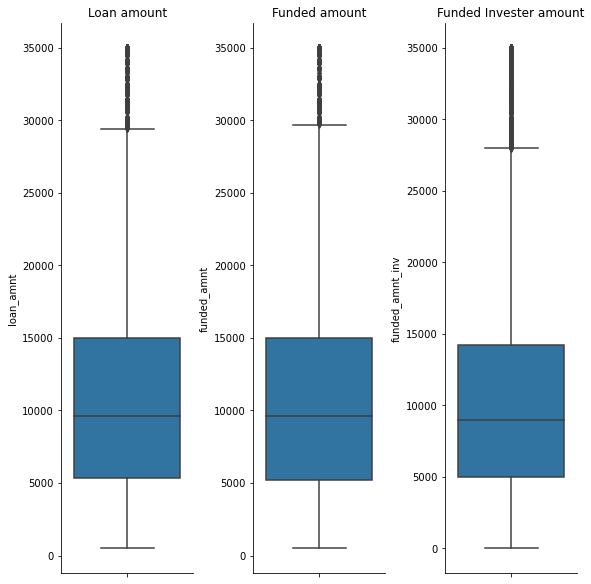

In [26]:
fig, ax1 = plt.subplots(1,3,figsize=(8, 8),constrained_layout=True)
#tidy = df.melt(id_vars='Factor').rename(columns=str.title)
sns.boxplot(y=loan_column_filter.loan_amnt,ax=ax1[0])
ax1[0].set_title("Loan amount")
sns.boxplot(y=loan_column_filter.funded_amnt,ax=ax1[1])
ax1[1].set_title("Funded amount")
sns.boxplot(y=loan_column_filter.funded_amnt_inv,ax=ax1[2])
ax1[2].set_title("Funded Invester amount")
#seaborn.barplot(y='Value',data=loan_column_filter, ax=ax1)
print(loan_column_filter.loan_amnt.describe())
sns.despine(fig)

## 3.1 Observations
From above plots we can conclude that **mjority of the cases loan amount(loan_amnt) requested are approved by approver(funded_amnt) and investers(funded_amnt_inv)**\
### Hence we can consider Loan amount itself for further analysis
For overall data shared below are the loan amounts\
    1. Mean = 11067\
    2. Max = 500\
    3. Min = 35000\
    4. 50 % = 9637

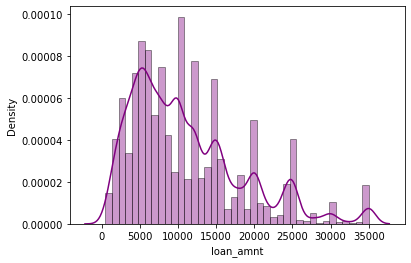

In [27]:
# Plotting historm for loan amount requested
#sns.histplot(loan_column_filter.loan_amnt)
import warnings
warnings.filterwarnings('ignore')
sns.distplot(a=loan_column_filter.loan_amnt, bins=40, color='purple',
             hist_kws={"edgecolor": 'black'})
plt.show()

## 3.2 Observations
For the given data set more people are opting for loan between 3000 to 10000 

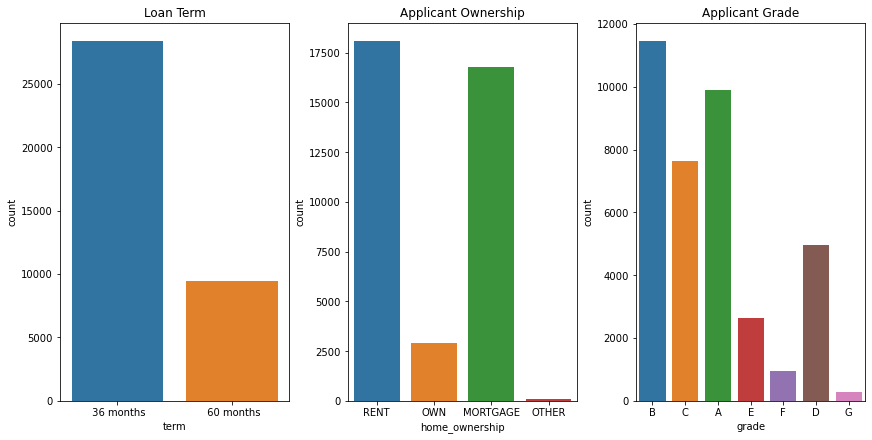

In [28]:
fig, t = plt.subplots(1,3,figsize=(12, 6),constrained_layout=True)
sns.countplot(x=loan_column_filter.term,ax=t[0])
t[0].set_title("Loan Term")
sns.countplot(x=loan_column_filter.home_ownership,ax=t[1])
t[1].set_title("Applicant Ownership")
sns.countplot(x=loan_column_filter.grade,ax=t[2])
t[2].set_title("Applicant Grade")
plt.show()

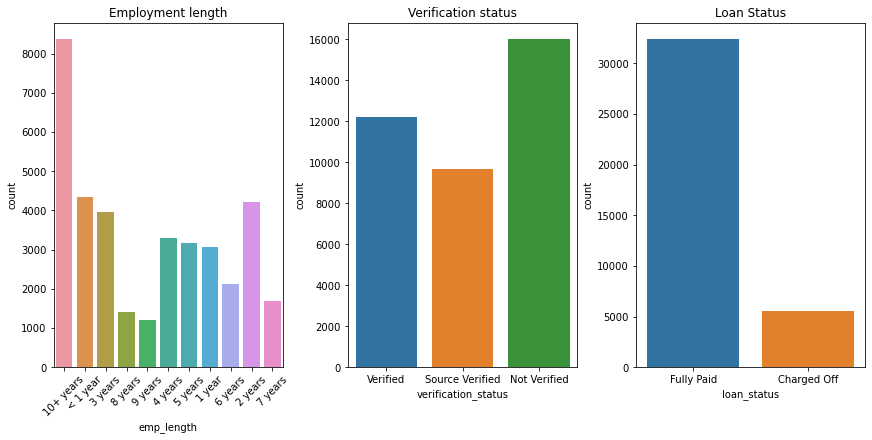

In [29]:
fig, t = plt.subplots(1,3,figsize=(12, 6),constrained_layout=True)
chart = sns.countplot(x=loan_column_filter.emp_length,ax=t[0])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
t[0].set_title("Employment length")
sns.countplot(x=loan_column_filter.verification_status,ax=t[1])
t[1].set_title("Verification status")
sns.countplot(x=loan_column_filter.loan_status,ax=t[2])
t[2].set_title("Loan Status")
plt.show()

## 3.3 Observations
1. **Term** : People opting for short team loan (36 months) are relatively higher compated to long term loans (60 months)\
2. **Home ownership** : Applicant who are having Rent or Mortage property are more intended to take loan over others\
3. **Grade** : People from grade A and B are among the most who take the loan\
4. **Employment Length** - Among applicants employees having maximum group of people are having 10+ years years experience\
5. **Verification Status** - For provided data we can infer majority of the loans are issued without verification\
6.**Loan Status** : About 85% of loans are fully paid and 15% of loans are Charged off

#### From loan issue date we can derive month to understand distribution of month for loans

In [51]:
loan_column_filter["issue_d"]

0        Dec-11
1        Dec-11
2        Dec-11
3        Dec-11
5        Dec-11
          ...  
39562    Nov-07
39573    Nov-07
39623    Oct-07
39666    Aug-07
39680    Aug-07
Name: issue_d, Length: 37880, dtype: object

In [66]:
loan_column_filter["issue_month"] = loan_column_filter.issue_d.apply(lambda x : x.split("-")[0] if("-" in x) else x )

In [67]:
loan_column_filter.issue_month.value_counts()

Dec    4132
Nov    3971
Oct    3715
Sep    3478
Aug    3355
Jul    3321
Jun    3179
May    2917
Apr    2831
Mar    2576
Jan    2214
Feb    2191
Name: issue_month, dtype: int64

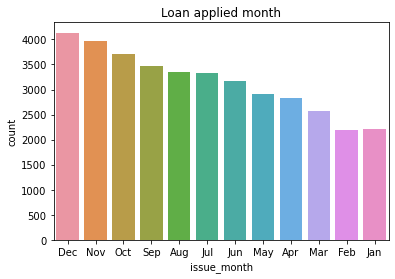

In [78]:
sns.countplot(x=loan_column_filter.issue_month)
plt.title("Loan applied month")
plt.show()

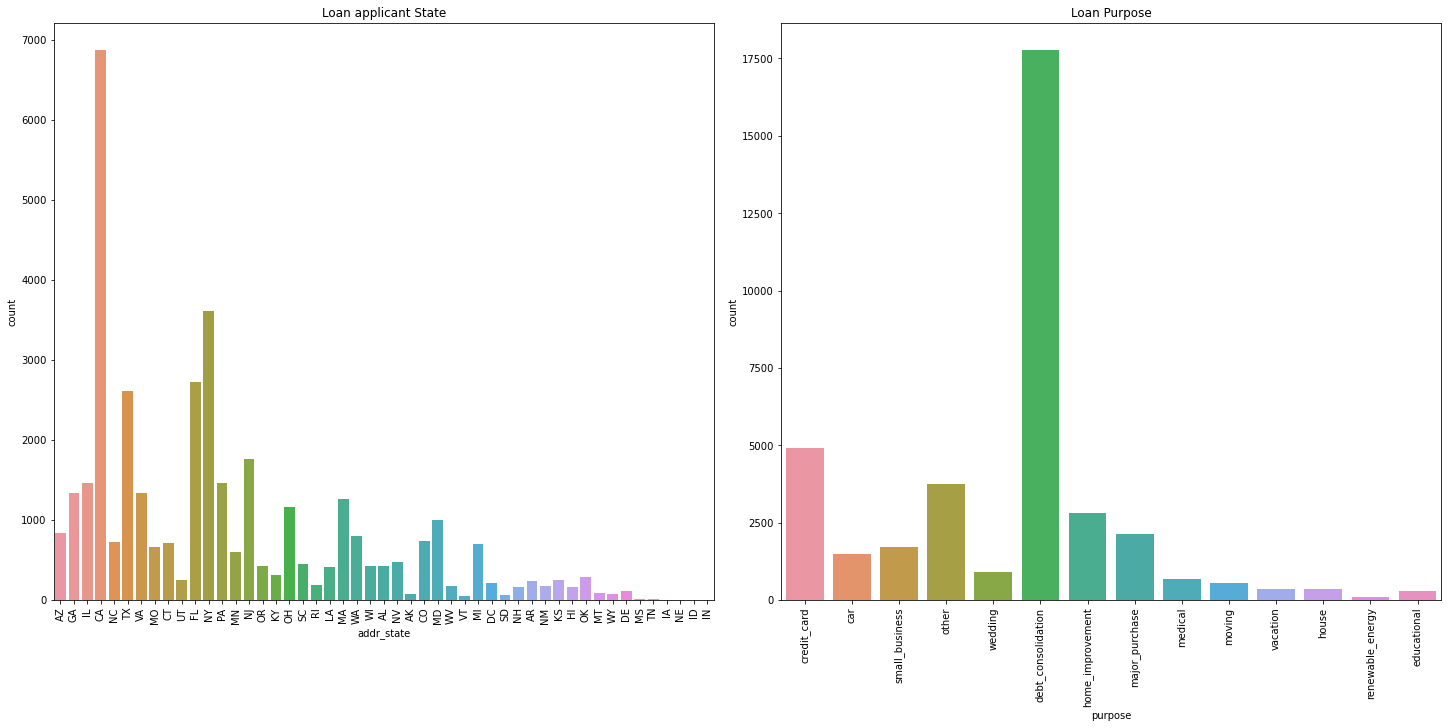

In [75]:
fig, t = plt.subplots(1,2,figsize=(20, 10),constrained_layout=True)
chart = sns.countplot(x=loan_column_filter.addr_state,ax=t[0])
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
t[0].set_title("Loan applicant State")
chart2 = sns.countplot(x=loan_column_filter.purpose,ax=t[1])
chart2.set_xticklabels(chart2.get_xticklabels(), rotation=90)
t[1].set_title("Loan Purpose")
plt.show()

## 3.4 Observations
1. **Loan issue month** : Number of people opting for loan increases as month progresses from Jan to Dec\
2. **Loan applicant Satat** : People are from CA and NY are most who applied for the loan\
3. **Pupose** : Debt consolidation is the most purpose for people who are applying for the loans

## Conclusion from univariat analysis
Single column analysis provided idea about distribution of data for each columns. Next will look into Bivariat analysis to derive dependency of all these variables with loan status

# 4. Bivariat Analysis

### Loan status is the driving factor for the analysis and hence we go with calculating 

####  loan status vs loan amount

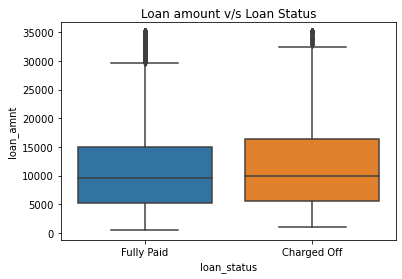

In [30]:
chart = sns.boxplot(x=loan_column_filter.loan_status,y=loan_column_filter.loan_amnt)
chart.set_title("Loan amount v/s Loan Status")
plt.show()

#### loan status vs interest rate

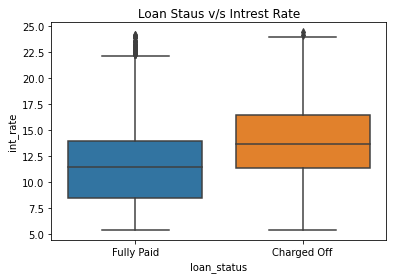

In [31]:
chart = sns.boxplot(x=loan_column_filter.loan_status,y=loan_column_filter.int_rate)
chart.set_title("Loan Staus v/s Intrest Rate")
plt.show()

#### loan status vs Term

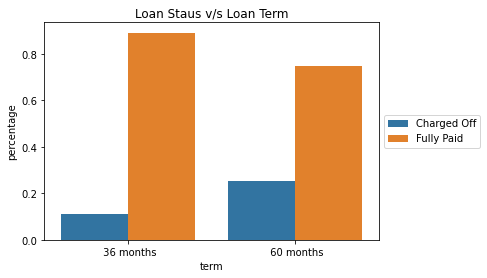

In [32]:
#Group by Term and status and find out the count
df_derive = loan_column_filter.groupby(['term', 'loan_status'], as_index=False)['id'].count()
df_derive['percentage'] = df_derive.groupby('term').transform(lambda x: x/x.sum())
chat = sns.barplot(x='term', y='percentage', hue='loan_status', data=df_derive, )
plt.title("Loan Staus v/s Loan Term")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

#### loan status vs Installments

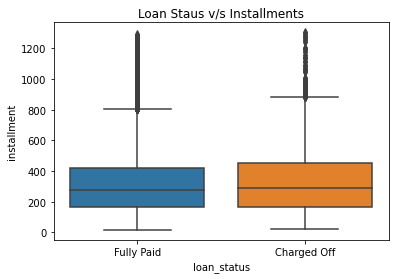

In [33]:
chart = sns.boxplot(x=loan_column_filter.loan_status,y=loan_column_filter.installment)
chart.set_title("Loan Staus v/s Installments")
plt.show()

#### loan status vs Grades

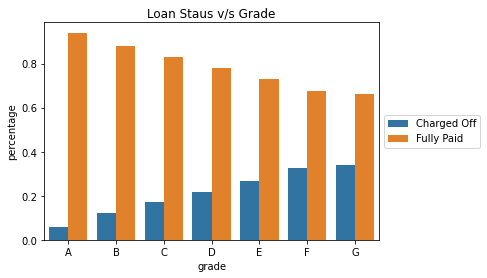

In [34]:
#Group by Grade and status and find out the count
df_derive = loan_column_filter.groupby(['grade', 'loan_status'], as_index=False)['id'].count()
df_derive['percentage'] = df_derive.groupby('grade').transform(lambda x: x/x.sum())
chat = sns.barplot(x='grade', y='percentage', hue='loan_status', data=df_derive, )
plt.title("Loan Staus v/s Grade")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

#### loan status vs Subgrades

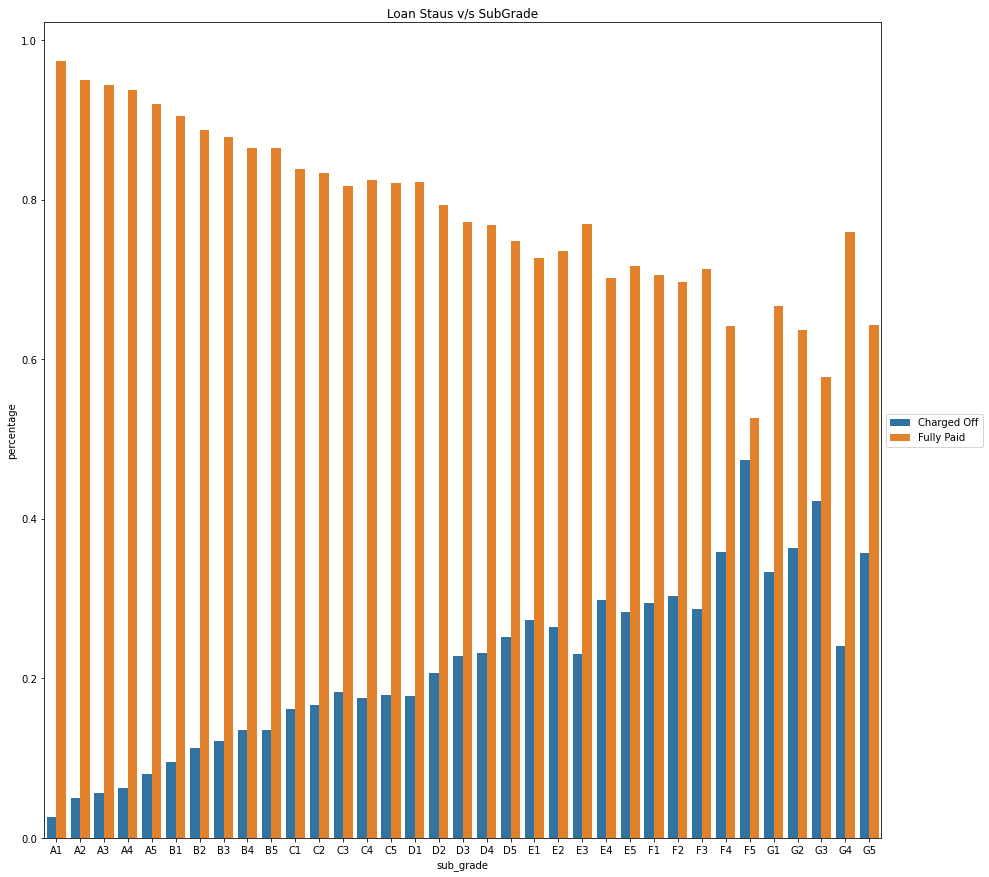

In [35]:
#Group by Grade,SubGrade and status and find out the count
df_derive = loan_column_filter.groupby(['grade','sub_grade','loan_status'], as_index=False)['id'].count()
df_derive['percentage'] = df_derive.groupby(['grade','sub_grade']).transform(lambda x: x/x.sum())
plt.figure(figsize=(15,15))
chat = sns.barplot(x='sub_grade', y='percentage', hue='loan_status', data=df_derive, )
plt.title("Loan Staus v/s SubGrade")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

#### loan status vs Employment length


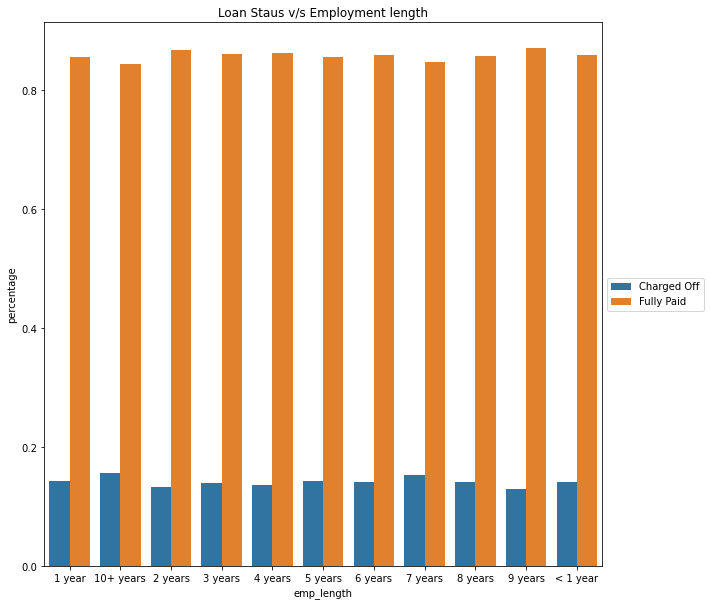

In [36]:
#Group by Employment length and status and find out the count
df_derive = loan_column_filter.groupby(['emp_length','loan_status'], as_index=False)['id'].count()
df_derive['percentage'] = df_derive.groupby('emp_length').transform(lambda x: x/x.sum())
plt.figure(figsize=(10,10))
chat = sns.barplot(x='emp_length', y='percentage', hue='loan_status', data=df_derive, )
plt.title("Loan Staus v/s Employment length")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

#### loan status vs Home Ownership

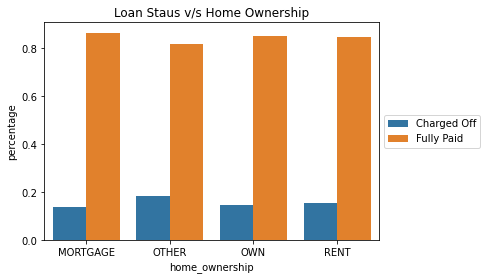

In [37]:
#Group by Home Ownership and status and find out the count
df_derive = loan_column_filter.groupby(['home_ownership','loan_status'], as_index=False)['id'].count()
df_derive['percentage'] = df_derive.groupby('home_ownership').transform(lambda x: x/x.sum())
# plt.figure(figsize=(10,10))
chat = sns.barplot(x='home_ownership', y='percentage', hue='loan_status', data=df_derive, )
plt.title("Loan Staus v/s Home Ownership")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

#### loan status vs Annual Income

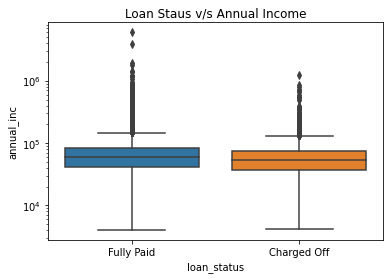

In [84]:
chart = sns.boxplot(x=loan_column_filter.loan_status,y=loan_column_filter.annual_inc)
plt.yscale('log')
chart.set_title("Loan Staus v/s Annual Income")
plt.show()

#### loan status vs Verification status

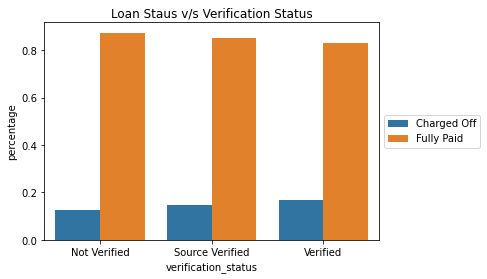

In [42]:
#Group by Verification status and status and find out the count
df_derive = loan_column_filter.groupby(['verification_status','loan_status'], as_index=False)['id'].count()
df_derive['percentage'] = df_derive.groupby('verification_status').transform(lambda x: x/x.sum())
# plt.figure(figsize=(10,10))
chat = sns.barplot(x='verification_status', y='percentage', hue='loan_status', data=df_derive, )
plt.title("Loan Staus v/s Verification Status")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

#### loan status vs Purpose

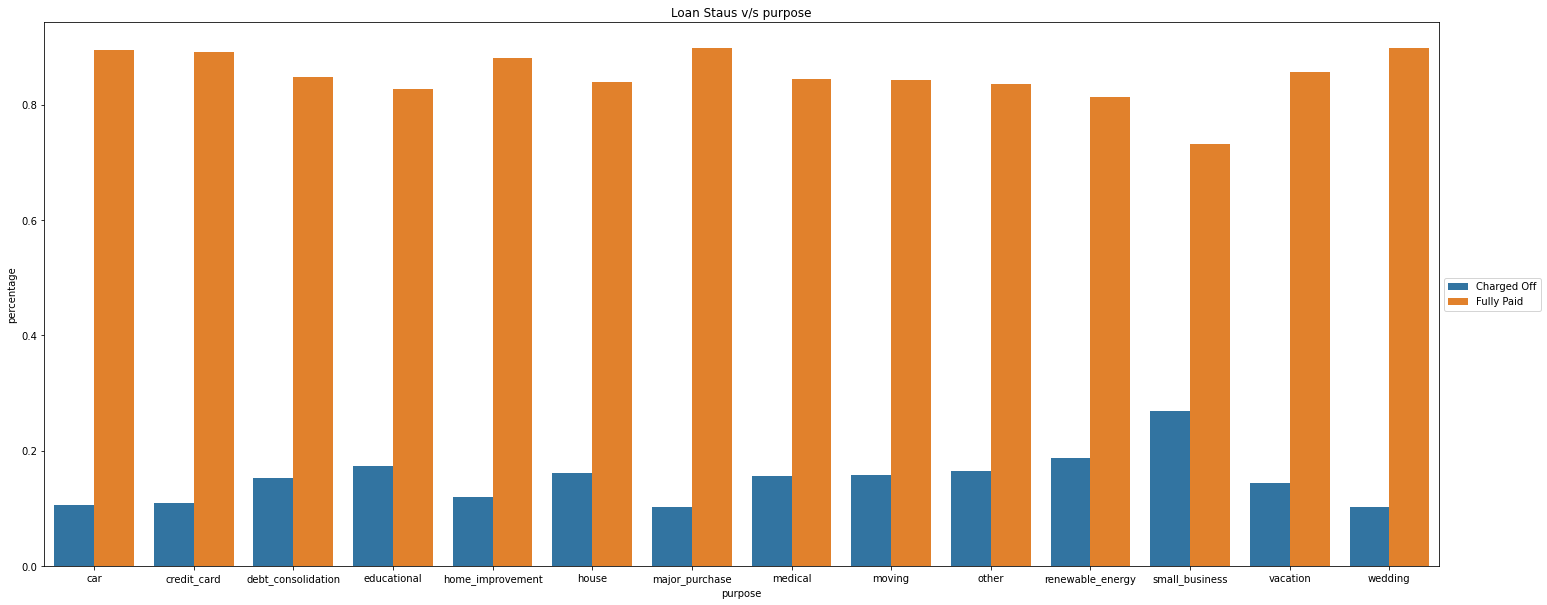

In [82]:
#Group by Purpose and status and find out the count
df_derive = loan_column_filter.groupby(['purpose','loan_status'], as_index=False)['id'].count()
df_derive['percentage'] = df_derive.groupby('purpose').transform(lambda x: x/x.sum())
plt.figure(figsize=(25,10))
chat = sns.barplot(x='purpose', y='percentage', hue='loan_status', data=df_derive, )
plt.title("Loan Staus v/s purpose")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

## 3.3 Observations
People opting for short team loan (36 months) are relatively higher compated to long term loans (60 months)

In [39]:
loan_column_filter.term.value_counts()

 36 months    28399
 60 months     9481
Name: term, dtype: int64

In [40]:
loan_column_filter.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'url', 'purpose', 'title', 'zip_code', 'addr_state',
       'dti', 'total_rec_prncp', 'pub_rec_bankruptcies'],
      dtype='object')

In [68]:
loan_column_filter.to_csv(r"C:\Users\i320807\Desktop\DS\Case Study\loan\loan_filter1.csv")